In [1]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 963.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
from fastai import *
from fastai.vision.all import *
from fastbook import *
from fastai.vision.widgets import *

In [3]:
%cd /content/drive/MyDrive/vehicle_classifier_project

/content/drive/MyDrive/vehicle_classifier_project


In [8]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [12]:
vehicle_data = 'vehicle_data'
dls = dblock.dataloaders(f"{os.getcwd()}/{vehicle_data}", bs=8)

In [15]:
torch.save(dls, f'{os.getcwd()}/dataloaders/data_loaders_v2.pkl')

In [16]:
dls = torch.load(f'{os.getcwd()}/dataloaders/data_loaders_v2.pkl')

<ipython-input-16-4b03826ae261>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dls = torch.load(f'{os.getcwd()}/dataloaders/data_loaders_v2.pkl')


In [17]:
model_convnext_small = vision_learner(dls, 'convnext_small', metrics=[error_rate, accuracy])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/201M [00:00<?, ?B/s]

In [18]:
model_convnext_small.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.145617,0.672038,0.193317,0.806683,55:53


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.831251,0.588279,0.181384,0.818616,1:27:43
1,0.781863,0.580121,0.152745,0.847255,1:27:25
2,0.737165,0.538895,0.159905,0.840095,1:27:29
3,0.410292,0.519947,0.138425,0.861575,1:27:33
4,0.319820,0.417839,0.116945,0.883055,1:26:54
5,0.195886,0.403473,0.109785,0.890215,1:28:10


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in by

In [19]:
model_convnext_small.save(f'{os.getcwd()}/models/model_convnext_small_v1')

Path('/content/drive/MyDrive/vehicle_classifier_project/models/model_convnext_small_v1.pth')

In [20]:
import pickle
with open(f'{os.getcwd()}/models/model_convnext_small_v1.pkl', 'wb') as f:
  pickle.dump(model_convnext_small, f)

In [21]:
with open(f'{os.getcwd()}/models/model_convnext_small_v1.pkl', 'rb') as f:
  best_model = pickle.load(f)

In [22]:
best_model.predict(f'{os.getcwd()}/{vehicle_data}/Ambulance/03c5d3d6-693a-4c30-9b00-bdf5843a3d39.jpg')

('Ambulance',
 tensor(2),
 tensor([1.8579e-06, 2.2997e-06, 9.9995e-01, 1.5687e-06, 2.0723e-06, 1.4305e-07, 2.9480e-07, 1.3143e-06, 1.1408e-06, 1.5053e-08, 4.2142e-06, 7.4304e-07, 1.4578e-06, 1.0276e-06, 7.1897e-06, 4.3891e-06,
         2.8320e-07, 2.0908e-06, 7.9280e-07, 6.2660e-07, 1.1792e-07, 7.3361e-06, 1.1333e-06, 2.2840e-07, 5.4205e-06]))

In [ ]:
# prompt: create a gadio app

from fastai.vision.all import *
from fastai.vision.widgets import *
import pickle

# Assuming your model and dataloaders are already saved as in the provided code.

# Load the best model and dataloaders
path = Path('/content/drive/MyDrive/vehicle_classifier_project') # Update if needed
with open(path/'models/model_convnext_small_v1.pkl', 'rb') as f:
    best_model = pickle.load(f)
dls = torch.load(path/'dataloaders/data_loaders_v2.pkl')

# Create the widgets
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()


def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = best_model.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run = widgets.Button(description='Classify')
btn_run.on_click(on_click_classify)

VBox([widgets.Label('Select your vehicle image!'),
      btn_upload, btn_run, out_pl, lbl_pred])


<Axes: >

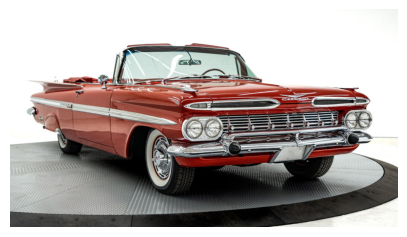

In [56]:
image_path = '/content/drive/MyDrive/vehicle_classifier_project/vehicle_data/Convertible/fd66b7e3-d965-4653-ae0b-62a2531cf731.jpg'#'/content/drive/MyDrive/vehicle_classifier_project/vehicle_data/Cargo Van/0278b742-465d-4fea-b658-2d9bb0a26f5c.png'#'/content/drive/MyDrive/vehicle_classifier_project/vehicle_data/Cargo Van/24e582c0-c76e-40e1-9983-ea7eda532582.jpg'#'/content/drive/MyDrive/vehicle_classifier_project/vehicle_data/Cargo Van/0f68e2fb-ffc4-4901-b201-88d932fc52cf.jpg'#'/content/drive/MyDrive/vehicle_classifier_project/vehicle_data/ATV/1d2679f0-2a45-4adf-85db-33ab4bd0f372.jpg'#'/content/drive/MyDrive/vehicle_classifier_project/vehicle_data/Lorry/fca86698-0334-49a6-aa8a-a9dac9969300.jpg'#'/content/drive/MyDrive/vehicle_classifier_project/vehicle_data/Lorry/ed70aaf9-f089-4516-bd2c-1c7d26c5958d.jpg'#'/content/drive/MyDrive/vehicle_classifier_project/vehicle_data/Lorry/d5b55069-bb75-4eb0-8c59-6152fdeef0d1.jpg'#'/content/drive/MyDrive/vehicle_classifier_project/vehicle_data/Lorry/bce9cc3e-f28e-4af9-8439-9983636202dc.jpg'#'/content/drive/MyDrive/vehicle_classifier_project/vehicle_data/Lorry/ada893a6-5663-4b97-8d80-23cab1184adc.jpg'#'/content/drive/MyDrive/vehicle_classifier_project/vehicle_data/Lorry/90605bc9-de97-43c7-94a7-569f54d13906.jpg'#'/content/drive/MyDrive/vehicle_classifier_project/vehicle_data/Hatchback/32943378-5b8a-4425-813c-a284c0eab54c.jpg'#'/content/drive/MyDrive/vehicle_classifier_project/vehicle_data/Military Vehicle/72f9a461-cccb-4ba3-b86d-c222b0833f52.jpg'#'/content/drive/MyDrive/vehicle_classifier_project/vehicle_data/Military Vehicle/4e5851cc-20fe-428a-81de-a96794f7cd76.jpg'#'/content/drive/MyDrive/vehicle_classifier_project/vehicle_data/Dirt Bike/1175556b-6b63-400f-b300-8a73c2066137.jpg'#f'/content/drive/MyDrive/vehicle_classifier_project/vehicle_data/Fire Truck/fc226aa7-cafb-48d2-ab78-ee5028842687.jpg'
img = PILImage.create(image_path)
img.show()

In [57]:
print(best_model.predict(image_path)[0])

Convertible
